<h1 align=center><font size=5>Linear Regression on Breast Cancer Dataset</font></h1>

### Table of contents


- [Data](#data)
- [Data Wrangling](#data_wrangling)
- [Data Statistics](#data_stats)
- [Exploratory Data Analysis](#data_exp)
- [Data Preparation](#data_prep)
- [Logistic Regression from Scratch](#LR_scratch)
- [Logistic Regression using Sklearn](#LR_sklearn)

### Data <a id="data"></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

&#x270d; How many features does the dataset have?

In [ ]:
print('Number of features:', len(dataset['feature_names']))

Number of features: 30


### Data Wrangling <a id="data_wrangling"></a>

&#x270d; Convert the dataset into Pandas dataframe for having easier data processing.

In [ ]:
import pandas as pd

df = pd.DataFrame(dataset.data, columns= dataset.feature_names)

df['Target'] = pd.Series(data= dataset.target, index= df.index)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df[df['Target'] == 0].shape

(212, 31)

### Data Statistics <a id="data_stats"></a>

&#x270d; Describe statistics of data including the central tendency, dispersion and shape of the dataset’s distribution.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


&#x270d; Check if there is any missing value in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Exploratory Data Analysis <a id="data_exp"></a>

&#x270d; Measure correlation among features.

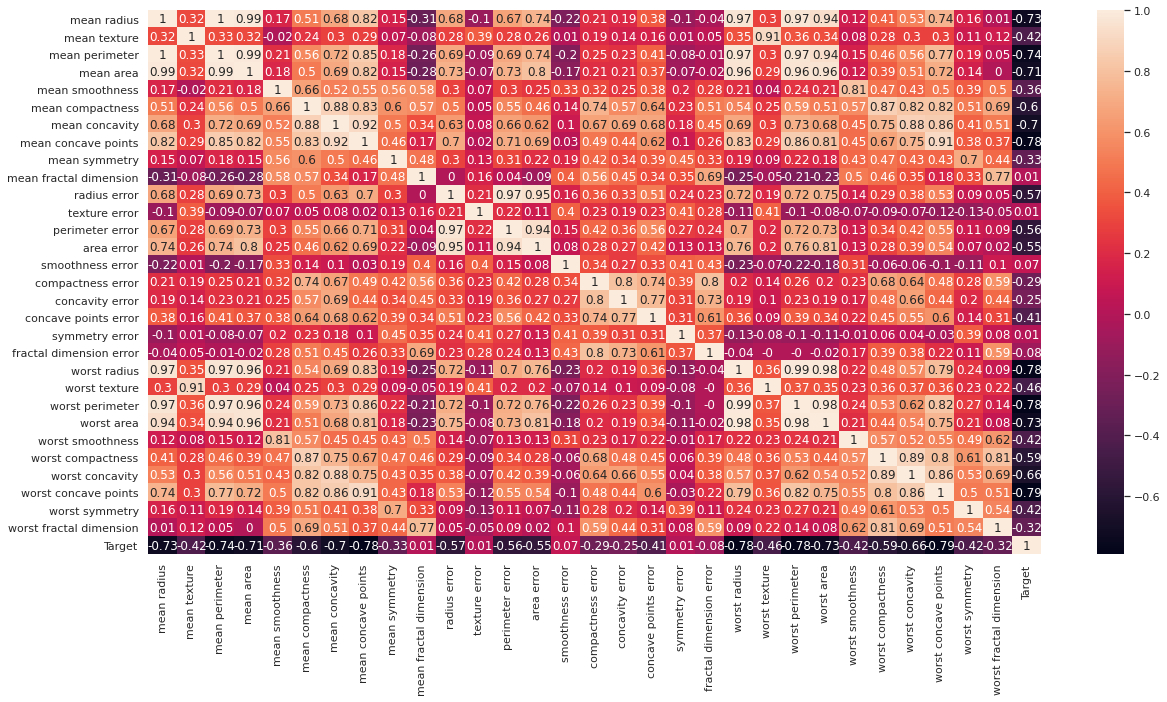

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

correlation_matrix = df.corr().round(2)
sns.heatmap(data= correlation_matrix, annot=True)

&#x270d; Pair plot features "worst radius", "worst texture", "worst perimeter", and "worst area", considerng the target variable.

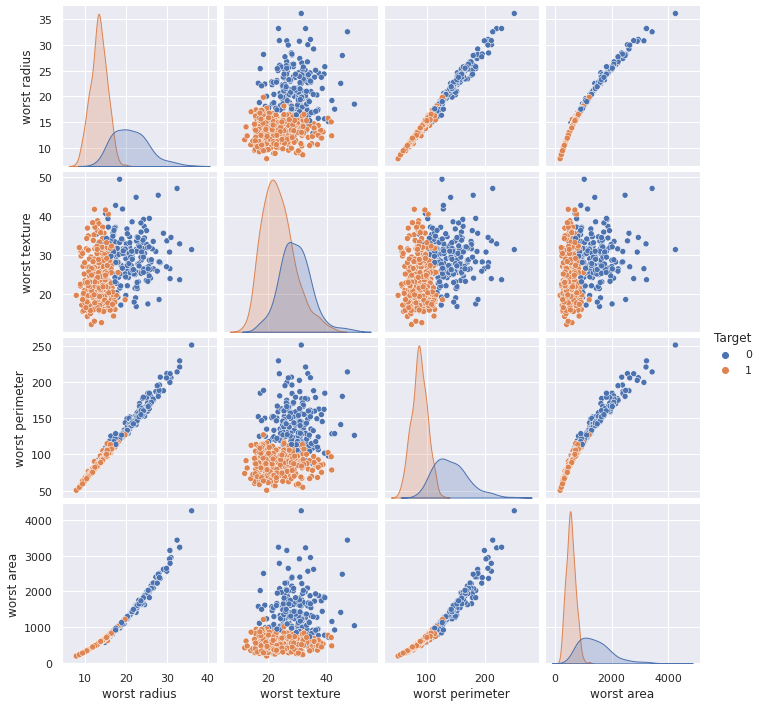

In [ ]:
sns.pairplot(vars=["worst radius", "worst texture", "worst perimeter", "worst area"], data=df, hue= 'Target')
plt.show()

&#x270d; What are your observations?

With both the correlation matrix and the pairplot graph we can se that features worst radius and worst area as well as worst perimeter and worst area along with the class distribution are highly correlated and seems to follow a polynomial regression.

worst perimeter and worst radius also seems to follow a linear regression.

&#x270d; What is the class distribution?

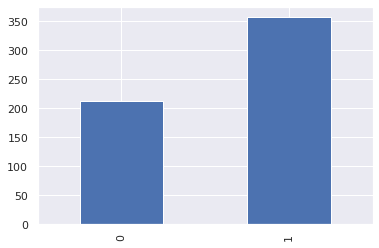

In [ ]:
plt.figure(figsize=(6,4))

df.Target.value_counts(ascending=True).plot(kind = 'bar')

### Data Preparation <a id="data_prep"></a>

&#x270d; Define predictor variable 'X' and target variable 'y'.

In [ ]:
X = df[df.columns[:-1]]
y = df.Target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.shape

(569,)

&#x270d; Split the data in a stratified fashion into training set with 80% of the samples and test set with the remaining 20%.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 123)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

#000000001111      #00000000 1111    -> 000011 000011

X_train shape: (455, 30)
X_test shape: (114, 30)


&#x270d; Standardize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression from Scratch <a id="LR_scratch"></a>

&#x270d; Implement logistic regression from scratch.

In [ ]:
#be careful about (n,1) versus (n,) arrays! It will fail to compile in (n,1) case!

class Logistic_Regression:
    def __init__(self, learningRate= 0.01, num_iter= 100):
        self.lr = learningRate
        self.num_iter = num_iter
    
    # Add intercept to input X
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Define the sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Define the cross entropy loss
    def loss(self, y, h):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # Fit the model
    def fit(self, X, y):
        
        # Add intercept to X
        X = self.add_intercept(X)
        
        # Initialize parameter theta
        self.theta = np.zeros(X.shape[1])
        
        
        loss_history = []
        for i in range(self.num_iter):
            # Calculate output h
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            
            # Calculate the loss and save it in loss_history
            loss_history.append(self.loss(y, h))
            
            # Calculate gradients
            gradient = np.dot(X.T, (h - y)) / y.size
            
            # Update theta parameters
            self.theta -= self.lr * gradient
        
        return loss_history

            
    # Calculate probability estimates
    def predict_prob(self, X):
        X = self.add_intercept(X)
        return self.sigmoid(np.dot(X, self.theta))
    
    # Predict class labels for samples in X
    def predict(self, X):
        return self.predict_prob(X).round()

In [ ]:
import numpy as np

# Create an instance of the above class
lr = Logistic_Regression(learningRate= 0.1, num_iter= 10000)
#lr.num_iter
# Fit the model over training set
J = lr.fit(X_train, y_train) #=> fit(lr, x_tran, ytrain)

# Make predictions over test set
y_test_pred = lr.predict(X_test)

# Measure accuracy over test set
accuracy = (y_test_pred == y_test).mean()
print('Accuracy over test set:', accuracy)

Accuracy over test set: 0.9649122807017544


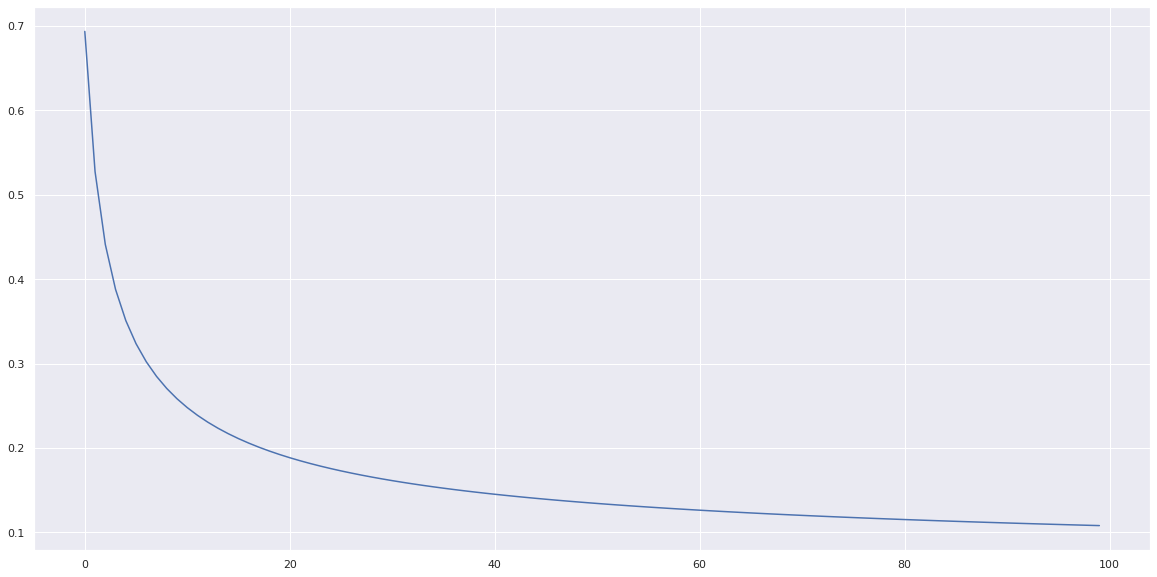

In [ ]:
# Plot loss vs training iterations

plt.plot(J)

### Logistic Regression using Sklearn <a id="LR_sklearn"></a>

&#x270d; Calculate linear regression parameters including the linear regression intercept and the linear regression coefficient, and make predictions over the data.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

&#x270d; Measure classification accuracy over the training/test sets.

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.99
Testing Accuracy: 0.97


&#x270d; Build a text report showing the main classification metrics including precision, recall, f1-score, and accuracy.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



&#x270d; Compute and plot confusion matrix.

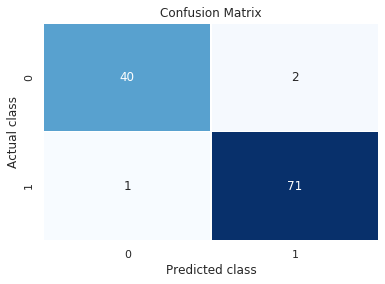

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,4))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");